In [70]:
%matplotlib inline

import os,sys,inspect

PATH = '/Users/francescogemignani/Desktop/fma-proj'
sys.path.insert(0, PATH) 


import pandas as pd
import numpy as np
from utility_functions import report
import seaborn as sns

# sklearn modules
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel

import plotly.express as px
import matplotlib.pyplot as plt
from fma_metadata import utils

import warnings
warnings.filterwarnings('ignore')

# Multi genre Classification
## # Librosa features

In [71]:
# Import features dataset
features = utils.load('/Users/francescogemignani/Google Drive/DM2/_FMA/fma_metadata/features.csv')
features.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20           -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       
2           1.481593  2.691455  0.866868  1.341231  ...  0.054125  0.012226   
3           1.366848  1.054094  0.108103  0.619185  ...  0.063831  0.014212   
5          -0.923192 -0.927232  0.666617  1.038546  ...  0.040730  0.012691   
10          1.770694  1.604566  0.521217  1.982386  ...  0.074358  0.017952   
20         -0.289294 -0.816410  0.043851 -0.804761  ...  0.095003  0.022492   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
track_id                                                                  
2           0.012111   5.758890  0.459473  0.085629  0.071289  0.000000   
3           0.017740   2.824694  0.466309  0.084578  0.063965  0.000000   
5           0.014759   6.808415  0.375000  0.053114  0.041504  0.000000   
10          0.013921  21.434212  0.452148  0.077515  0.071777  0.000000   
20          0.021355  16.669037  0.469727  0.047225  0.040039  0.000977   

feature                         
statistics      skew       std  
number            01        01  
track_id                        
2           2.089872  0.061448  
3           1.716724  0.069330  
5           2.193303  0.044861  
10          3.542325  0.040800  
20          3.189831  0.030993  

[5 rows x 518 columns]

In [72]:
# Import genre_labels dataset
labels = pd.read_csv('/Users/francescogemignani/Desktop/fma-proj/src/Data (cleaned)/genres_top')
labels=labels.set_index('track_id')
labels.head()

genre_top
track_id          
2          Hip-Hop
3          Hip-Hop
5          Hip-Hop
10             Pop
134        Hip-Hop

In [73]:
# Merging genre_top with librosa
features = features.merge(labels, on='track_id')
features.head()

(chroma_cens, kurtosis, 01)  (chroma_cens, kurtosis, 02)  \
track_id                                                             
2                            7.180653                     5.230309   
3                            1.888963                     0.760539   
5                            0.527563                    -0.077654   
10                           3.702245                    -0.291193   
134                          0.918445                     0.674147   

          (chroma_cens, kurtosis, 03)  (chroma_cens, kurtosis, 04)  \
track_id                                                             
2                            0.249321                     1.347620   
3                            0.345297                     2.295201   
5                           -0.279610                     0.685883   
10                           2.196742                    -0.234449   
134                          0.577818                     1.281117   

          (chroma_cens, kurtosis, 05)  (chroma_cens, kurtosis, 06)  \
track_id                                                             
2                            1.482478                     0.531371   
3                            1.654031                     0.067592   
5                            1.937570                     0.880839   
10                           1.367364                     0.998411   
134                          0.933746                     0.078177   

          (chroma_cens, kurtosis, 07)  (chroma_cens, kurtosis, 08)  \
track_id                                                             
2                            1.481593                     2.691455   
3                            1.366848                     1.054094   
5                           -0.923192                    -0.927232   
10                           1.770694                     1.604566   
134                          1.199204                    -0.175223   

          (chroma_cens, kurtosis, 09)  (chroma_cens, kurtosis, 10)  ...  \
track_id                                                            ...   
2                            0.866868                     1.341231  ...   
3                            0.108103                     0.619185  ...   
5                            0.666617                     1.038546  ...   
10                           0.521217                     1.982386  ...   
134                          0.925482                     1.438509  ...   

          (tonnetz, std, 05)  (tonnetz, std, 06)  (zcr, kurtosis, 01)  \
track_id                                                                
2                   0.012226            0.012111             5.758890   
3                   0.014212            0.017740             2.824694   
5                   0.012691            0.014759             6.808415   
10                  0.017952            0.013921            21.434212   
134                 0.016322            0.015819             4.731087   

          (zcr, max, 01)  (zcr, mean, 01)  (zcr, median, 01)  (zcr, min, 01)  \
track_id                                                                       
2               0.459473         0.085629           0.071289             0.0   
3               0.466309         0.084578           0.063965             0.0   
5               0.375000         0.053114           0.041504             0.0   
10              0.452148         0.077515           0.071777             0.0   
134             0.419434         0.064370           0.050781             0.0   

          (zcr, skew, 01)  (zcr, std, 01)  genre_top  
track_id                                              
2                2.089872        0.061448    Hip-Hop  
3                1.716724        0.069330    Hip-Hop  
5                2.193303        0.044861    Hip-Hop  
10               3.542325        0.040800        Pop  
134              1.806106        0.054623    Hip-Hop  

[5 rows x 519 columns]

In [74]:
# drop NaN
features.dropna(inplace=True)
features.isnull().sum()

(chroma_cens, kurtosis, 01)    0
(chroma_cens, kurtosis, 02)    0
(chroma_cens, kurtosis, 03)    0
(chroma_cens, kurtosis, 04)    0
(chroma_cens, kurtosis, 05)    0
                              ..
(zcr, median, 01)              0
(zcr, min, 01)                 0
(zcr, skew, 01)                0
(zcr, std, 01)                 0
genre_top                      0
Length: 519, dtype: int64

In [75]:
features.genre_top.value_counts()

Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: genre_top, dtype: int64

In [76]:
# Select top 8 genres occourred
genres_subset = ['Rock','Electronic','Hip-Hop','Folk','Old-Time / Historic','Pop',
          'Classical','Jazz']

# generating dataset for multiclass classification task
feat_all = features[features['genre_top'].isin(genres_subset)]
feat_all.head()

(chroma_cens, kurtosis, 01)  (chroma_cens, kurtosis, 02)  \
track_id                                                             
2                            7.180653                     5.230309   
3                            1.888963                     0.760539   
5                            0.527563                    -0.077654   
10                           3.702245                    -0.291193   
134                          0.918445                     0.674147   

          (chroma_cens, kurtosis, 03)  (chroma_cens, kurtosis, 04)  \
track_id                                                             
2                            0.249321                     1.347620   
3                            0.345297                     2.295201   
5                           -0.279610                     0.685883   
10                           2.196742                    -0.234449   
134                          0.577818                     1.281117   

          (chroma_cens, kurtosis, 05)  (chroma_cens, kurtosis, 06)  \
track_id                                                             
2                            1.482478                     0.531371   
3                            1.654031                     0.067592   
5                            1.937570                     0.880839   
10                           1.367364                     0.998411   
134                          0.933746                     0.078177   

          (chroma_cens, kurtosis, 07)  (chroma_cens, kurtosis, 08)  \
track_id                                                             
2                            1.481593                     2.691455   
3                            1.366848                     1.054094   
5                           -0.923192                    -0.927232   
10                           1.770694                     1.604566   
134                          1.199204                    -0.175223   

          (chroma_cens, kurtosis, 09)  (chroma_cens, kurtosis, 10)  ...  \
track_id                                                            ...   
2                            0.866868                     1.341231  ...   
3                            0.108103                     0.619185  ...   
5                            0.666617                     1.038546  ...   
10                           0.521217                     1.982386  ...   
134                          0.925482                     1.438509  ...   

          (tonnetz, std, 05)  (tonnetz, std, 06)  (zcr, kurtosis, 01)  \
track_id                                                                
2                   0.012226            0.012111             5.758890   
3                   0.014212            0.017740             2.824694   
5                   0.012691            0.014759             6.808415   
10                  0.017952            0.013921            21.434212   
134                 0.016322            0.015819             4.731087   

          (zcr, max, 01)  (zcr, mean, 01)  (zcr, median, 01)  (zcr, min, 01)  \
track_id                                                                       
2               0.459473         0.085629           0.071289             0.0   
3               0.466309         0.084578           0.063965             0.0   
5               0.375000         0.053114           0.041504             0.0   
10              0.452148         0.077515           0.071777             0.0   
134             0.419434         0.064370           0.050781             0.0   

          (zcr, skew, 01)  (zcr, std, 01)  genre_top  
track_id                                              
2                2.089872        0.061448    Hip-Hop  
3                1.716724        0.069330    Hip-Hop  
5                2.193303        0.044861    Hip-Hop  
10               3.542325        0.040800        Pop  
134              1.806106        0.054623    Hip-Hop  

[5 rows x 519 columns]

In [77]:
feat_all.shape

(34596, 519)

In [78]:
pd.concat([feat_all.genre_top.value_counts(),
                round(feat_all.genre_top.value_counts(normalize=True).mul(100),2)],
          axis=1,
          keys=('counts','percentage (%)'))

counts  percentage (%)
Rock                  14182           40.99
Electronic             9372           27.09
Hip-Hop                3552           10.27
Folk                   2803            8.10
Pop                    2332            6.74
Classical              1230            3.56
Jazz                    571            1.65
Old-Time / Historic     554            1.60

In [79]:
# encoding labels
le = preprocessing.LabelEncoder()
feat_all['genre_top'] = le.fit_transform(feat_all['genre_top'])
print('Legend:\n0: Classical\n1: Electronic\n2: Folk\n3: Hip-Hop\n4: Jazz\n5: Old-Time / Historic\n6: Pop\n7: Rock')
feat_all.genre_top.value_counts()

Legend:
0: Classical
1: Electronic
2: Folk
3: Hip-Hop
4: Jazz
5: Old-Time / Historic
6: Pop
7: Rock


7    14182
1     9372
3     3552
2     2803
6     2332
0     1230
4      571
5      554
Name: genre_top, dtype: int64

In [80]:
# detach target col
labels = feat_all[['genre_top']]
labels.reset_index(drop=True, inplace=True)
labels = labels['genre_top']

In [81]:
feat_all.drop('genre_top', axis=1, inplace=True)

In [82]:
# normalize all data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(feat_all)

# 2. PCA on normalized data
## 2.1 Determine optimal number of components
### a) screen-plot

Text(0.5, 0, 'Principal Component #')

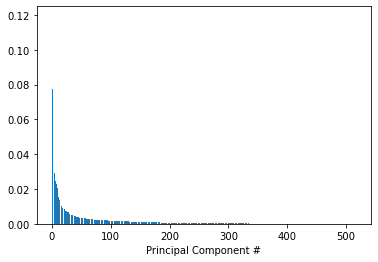

In [83]:
pca = PCA()
pca.fit(scaled_features)
# get explained variance ratios from PCA using all features
exp_variance = pca.explained_variance_ratio_
# plot explained variance
fig, ax= plt.subplots()
ax.bar(range(pca.n_components_),exp_variance)
ax.set_xlabel('Principal Component #')

### b) cumulative explained variance plot

Optimal number of components: 152
Explained variation per principal component:
[1.19045918e-01 7.75472323e-02 4.09358743e-02 3.14708249e-02
 2.93193965e-02 2.59461346e-02 2.46854612e-02 2.37764997e-02
 2.28110193e-02 2.04168646e-02 1.78719788e-02 1.55423005e-02
 1.42070758e-02 1.39018382e-02 1.30138548e-02 1.16497565e-02
 1.03535566e-02 9.78742297e-03 9.35364858e-03 9.20689493e-03
 8.88709493e-03 8.27491225e-03 8.00739328e-03 7.58835894e-03
 7.26664910e-03 7.10596178e-03 6.89994324e-03 6.55399652e-03
 6.52770406e-03 6.30209263e-03 5.72200725e-03 5.55734011e-03
 5.41593903e-03 5.26538662e-03 5.11653837e-03 5.01000144e-03
 4.85771739e-03 4.77991602e-03 4.51631790e-03 4.44542856e-03
 4.42333617e-03 4.28092829e-03 4.04121013e-03 3.94219448e-03
 3.88860449e-03 3.74428489e-03 3.64467946e-03 3.60659547e-03
 3.53373031e-03 3.46182633e-03 3.43455869e-03 3.41878646e-03
 3.36796044e-03 3.25096181e-03 3.20614680e-03 3.16137148e-03
 3.10813525e-03 3.05675451e-03 2.97087625e-03 2.92969558e-03
 2.916

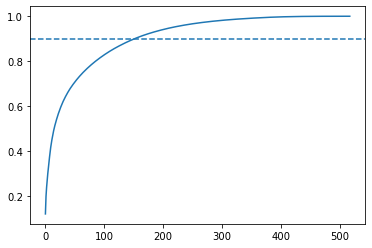

In [84]:
# calculate the cumulative explained variance
cum_exp_var = np.cumsum(exp_variance)

# plot the cumulative explained variance and draw a dashed line at 0.9\
# This line indicates how much variance (information) we want to retain
fig, ax= plt.subplots()
ax.plot(cum_exp_var)
ax.axhline(y=0.9, linestyle='--')

# find index where cum_exp_var exceeds 0.9 and adding 1 to that index to get the num of components
n_components = ((np.where(cum_exp_var > 0.9))[0][0])
print(f"Optimal number of components: {n_components}")
print(f"Explained variation per principal component:\n{pca.explained_variance_ratio_}")
# perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components,random_state=10)
pca.fit(scaled_features)
pca_proj = pca.transform(scaled_features)

## 2.2 Plot PCA in 2D

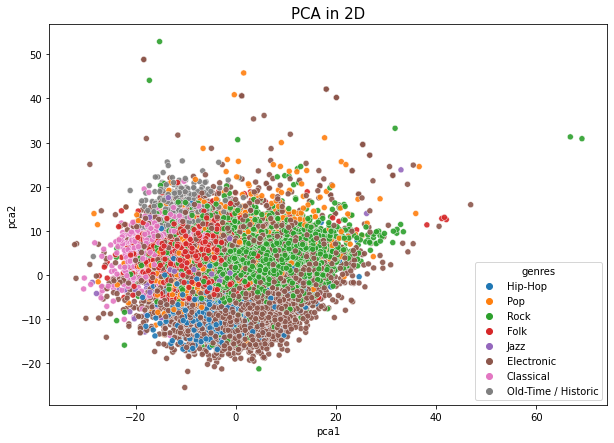

In [85]:
# generating df for plotting PCA
df = pd.DataFrame()
df['pca1'] = pca_proj[:,0]
df['pca2'] = pca_proj[:,1]
df['pca3'] = pca_proj[:,2]
df['genres'] = le.inverse_transform(labels)

# plot scatter of PCA
plt.figure(figsize=(10,7))
sns.scatterplot(
    x="pca1", y="pca2",
    hue='genres',
    data=df,
    legend="full",
    alpha=0.9
)
plt.title("PCA in 2D", fontsize= 15)
plt.show()

### 2.3 Plot PCA in 3D

In [87]:
# 3D PCA
#total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    df, x='pca1', y='pca2', z='pca3', color='genres',
    #title=f'Total Explained Variance: {total_var:.2f}%',
    #labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.update_layout(legend=dict(
    orientation="v",
    yanchor="bottom",
    y=1,
    xanchor="right",
    x=0.6
),width=700, height=700, scene_camera_eye_z=0.8)
fig.show()

# 3. Split data for classification

In [88]:
# shuffle and split into development set and internal test set:
# (PCA)
Xpca_develop, Xpca_test, y_develop_pca, y_test_pca = train_test_split(
pca_proj, labels, test_size=0.30, random_state=10)

# (no PCA)
X_develop, X_test, y_develop, y_test = train_test_split(
scaled_features, labels, test_size=0.30, random_state=10)

In [89]:
# check partitions
print(f"____Legend_____\n0: Classical\n1: Electronic\n2: Folk\n3: Hip-Hop\n4: Jazz\n5: Old-Time / Historic\n6: Pop\
\n7: Rock'\n\n***PCA***\nDevelopment set:\n{y_develop_pca.value_counts()}\n{len(y_develop_pca)}\n\nInternal Test:\
\n{y_test_pca.value_counts()}\n{len(y_test_pca)}\n\n\-----------------\n\***No-PCA***\nDevelopment set:\n{y_develop.value_counts()}\n{len(y_develop)}\n\nInternal Test:\n{y_test.value_counts()}\n{len(y_test)}")



____Legend_____
0: Classical
1: Electronic
2: Folk
3: Hip-Hop
4: Jazz
5: Old-Time / Historic
6: Pop
7: Rock'

***PCA***
Development set:
7    9961
1    6551
3    2503
2    1952
6    1616
0     857
5     390
4     387
Name: genre_top, dtype: int64
24217

Internal Test:
7    4221
1    2821
3    1049
2     851
6     716
0     373
4     184
5     164
Name: genre_top, dtype: int64
10379

\-----------------
\***No-PCA***
Development set:
7    9961
1    6551
3    2503
2    1952
6    1616
0     857
5     390
4     387
Name: genre_top, dtype: int64
24217

Internal Test:
7    4221
1    2821
3    1049
2     851
6     716
0     373
4     184
5     164
Name: genre_top, dtype: int64
10379


# 4. Decision Tree
### a) Unbalanced - without PCA
#### - Features Selection
Features selection has been performed with sklearn.feature_selection.SelectFromModel 

In [90]:
sel = SelectFromModel(DecisionTreeClassifier())
X_develop_sel = sel.fit_transform(X_develop, y_develop)

In [91]:
print(f"Original number of features: {len(feat_all.columns)}\nAfter Feature Selector: {X_develop_sel.shape[1]}\nNumber of Features detached: {len(feat_all.columns)-X_develop_sel.shape[1]}")

Original number of features: 518
After Feature Selector: 120
Number of Features detached: 398


In [92]:
X_test_sel = sel.transform(X_test)

#### - Validation Schema: coarse grid-search with 5 fold CV
We adopt a 5 fold cross validation repeated 10 times and then averaged, in order to reduce the variance of the model.

In [94]:
# search parameters
param_grid = {
               "max_depth": [4,5,6,7,9,10],
               "min_samples_leaf": [10,15,20,25,35,45,50,55],
               "min_samples_split": [10,20,30,40,50],
               "criterion": ["gini"]
             }

# instantiate a model
dtc = DecisionTreeClassifier()
rep_kfold = RepeatedKFold(n_splits=5, n_repeats=1, random_state=42)
clf = GridSearchCV(dtc, cv =rep_kfold , param_grid=param_grid, n_jobs=2, verbose=True)
clf.fit(X_develop_sel, y_develop)
# display top 3 models
print(f"best parameters:\n{clf.best_params_}\naccuracy: {clf.best_score_}")
report(clf.cv_results_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   40.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  2.7min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  7.0min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 14.2min
[Parallel(n_jobs=2)]: Done 1200 out of 1200 | elapsed: 24.9min finished


best parameters:
{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 25, 'min_samples_split': 20}
accuracy: 0.6403768078183448
Model with rank: 1
Mean validation score: 0.640 (std: 0.009)
Parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 25, 'min_samples_split': 20}

Model with rank: 2
Mean validation score: 0.640 (std: 0.009)
Parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 25, 'min_samples_split': 50}

Model with rank: 3
Mean validation score: 0.640 (std: 0.009)
Parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 25, 'min_samples_split': 10}



#### - Train and predict

In [ ]:
# train and fit
dtc = DecisionTreeClassifier(criterion= 'gini',max_depth=7,min_samples_leaf= 35)
dtc.fit(X_develop_sel,y_develop)
# predict on internal test set
y_pred_dtc = dtc.predict(X_test_sel)

# display metrics
print('Accuracy %s' % accuracy_score(y_test, y_pred_dtc))
print('F1-score %s' % f1_score(y_test, y_pred_dtc, average=None))
print(classification_report(y_test, y_pred_dtc))